# Guided Project: Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate). 

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

### Instructions

1. Read in the `euro-daily-hist_1999_2020.csv` file into a pandas `DataFrame` — store the file into a variable named `exchange_rates`.
2. Inspect the first and the last five rows to understand the structure of the dataset.
3. Use the `DataFrame.info()` method to learn some basic facts about the dataset:
    * What is the number of rows and columns?
    * Are there null values?
    * What is the data type of each column?

In [5]:
# Read csv file
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

# Inspect first and last rows
print(exchange_rates.head())
print(exchange_rates.head())

# Use dataframe.info()
exchange_rates.info()

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

5 rows and 41 columns, no null values. Most are objects, a handful are float data type.

## Data Cleaning

Our focus in the guided part of the project will be on the exchange rate between the euro and the American dollar. If you want to explore a different currency after finishing the guided part, the code we use for cleaning will come in handy.

Below, we do the following:

* We rename the `[US dollar ]` and `Period\Unit:` columns to something easier to type — `US_dollar` and `Time`.
* We change the `Time` column to a `datetime` data type.
* We sort the values by `Time` in ascending order.
* We reset the index (and drop the initial index).

`
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
`

### Instructions

1. Run the code above in your notebook — `exchange_rates` is the variable name we used for reading in the `euro-daily-hist_1999_2020.csv` file.
2. Isolate the `Time` and the `US_dollar` columns. Assign them to a different variable named `euro_to_dollar`.
3. Run the `Series.value_counts()` method on the `US_dollar` column, and see if you notice anything wrong.
4. Drop all the rows where the `-` character appears in the `US_dollar` column.
5. Convert the `US_dollar` column to a `float` data type.

In [6]:
# Rerun the code above
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [13]:
# Isolate Time and US_dollar columns
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()
print(euro_to_dollar['US_dollar'].value_counts())

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
0.9264     1
0.8587     1
1.3330     1
0.9592     1
1.3858     1
Name: US_dollar, Length: 3528, dtype: int64


In [17]:
# Drop all rows with - character
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# Convert US_dollar column to float data type
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

## Rolling Mean

Now that we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

`
import matplotlib.pyplot as plt
%matplotlib inline # Enables Jupyter to display graphs

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()
`

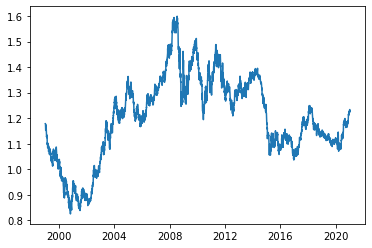

If we look at the line's shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: : they are the visual representation of the daily variation in the exchange rate. The rate goes up and down, up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

To understand how a rolling mean works, let's say we have ten values for ten consecutive days.

`
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))
values
`

The value of the second day is `3`. Let's say we rather want that value to be the mean between the value of the first day and the value of the second day. The value of the first day is `1`, the value of the second day is `3`, and their arithmetical mean is `2`.

Let's now say we want the same for each day: the value is the mean between the value of that day and the value of the previous day. For the third day, the value is the mean between the third and the second day. For the seventh day, the value is the mean between the seventh and the sixth day, and so on.

We can calculate the mean for each day using the [`pandas.Series.rolling().mean()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) — the only exception is the first day, which doesn't have a previous day.

`
values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()
values
`

We calculated the rolling mean using values from two days — the current day and the previous day. We call the number of days used in the calculation the rolling window (or moving window). If the rolling window is three, then we calculate the mean between the value of the current day and the values of the previous two days.

`
values['rolling_mean_3'] = values['daily_values'].rolling(3).mean()
values['rolling_mean_5'] = values['daily_values'].rolling(5).mean()
values
`

The rolling window can take various values — some common values include seven (one week), 30 (one month), 50 or 100 days, or 365 days (one year).

Below, we see how our line plot changes visually as we increase the rolling window. The window gets larger, and the line becomes smoother. This increases the data-ink ratio, and it can be useful if we want the audience to focus only on long-term trends.

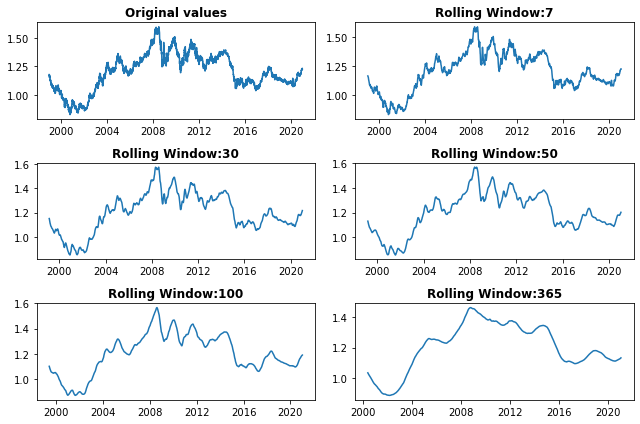

### Instructions

1. Calculate the rolling means for the `US_dollar` column using a moving window of 30 days. Add the rolling means to a new column named `rolling_mean`.

In [21]:
# Calculate rolling moving window of 30 days
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


## Coming up with an Idea

Our goal is to create a storytelling data visualization using the data we have.

To create a story, remember that we need to arrange our data into a series of events that show change.

Here are a few story ideas for our data:

* We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
* We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
* We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

These are just a few ideas — you should think of a story angle that you find interesting.

Don't become frustrated if you don't have an idea — creativity is unpredictable. Sometimes you can have ten ideas in a minute, and sometimes you won't have any ideas in a week.

### Instructions

1. Note one idea regarding the storytelling data visualization you want to build.

We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

## Sketching a Graph

First, we need to choose the right graph type. The graph should give our story the visual form it needs — we don't want to choose a histogram to visually represent a time series.

Equally important, we need to choose something that our audience will be familiar with. To simplify your work, you can choose any audience you want for your graph.

Next, we're going to sketch the graph — we do this before writing the code. In sketching the graph, it's important to use some of the principles we've learned so far:

* Maximize the data-ink ratio.
* Create visual patterns using Gestalt principles.
* Guide the audience's attention using pre-attentive attributes.

These design principles can help you in two ways:

* They generate design options.
* They help you choose among those options.

We advise using pen and paper to sketch the graph because it gives you more flexibility. Alternatively, you can make the sketch using a graphics editor.

This is another step that relies on creativity, so we're going to say it again: creativity is unpredictable, so don't become frustrated. If you don't come up with an idea, we have a few suggestions on the next screen.

## Coding the Graph

Now that we have a good idea of the story we want to tell and how it's going to look, we'll start coding.

Writing the code yourself may feel intimidating. However, you don't have to create the best graph in the world. The point here is to get better at building something yourself.

Here are a few tips on how to approach this:

* If you don't remember something you've already learned (a common issue when we're learning), read that part of the lesson again.
* Google any Matplotlib issue you may have. For better results, start your queries with the word "matplotlib":
    * "matplotlib how to remove tick labels"
    * "matplotlib how to remove only the right and the top axes"
* Don't hesitate to read Matplotlib documentation or look through their examples gallery.
* Matplotlib doesn't have a function for everything — try to improvise by separately creating the constituent parts of what you want to build.
* Where there is code, there will be errors — google any errors you can't fix.
* Reach out to the Dataquest community if you get stuck.

If you're going to run the code in the solution notebook, and the lines on your plots disappear, or you get a `ValueError: Image size of AxB pixels` is too large, see this [Community thread](https://community.dataquest.io/t/getting-an-image-size-error-in-guided-project-storytelling-data-visualization-on-exchange-rates/552213/2?u=alex).

### Instructions

1. Code the graph you sketched in the previous step.

In [25]:
# Create segmented data
financial_crisis = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2006
                   ) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy(
                   )[(euro_to_dollar.Time.dt.year >= 2007
                   ) & (euro_to_dollar.Time.dt.year <= 2008)]

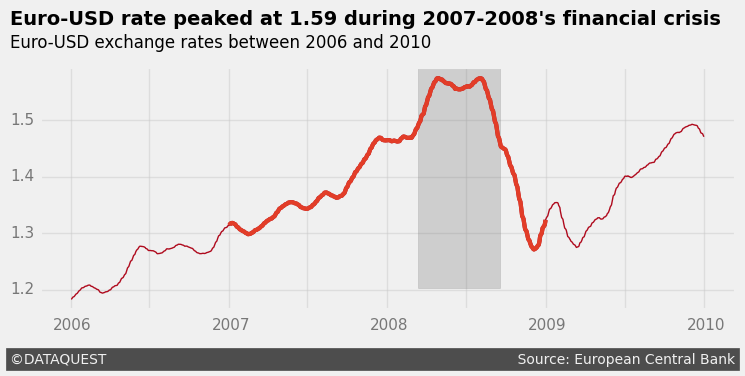

In [29]:
# Create graph
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
style.use('fivethirtyeight')

fig,ax = plt.subplots(figsize=(8, 3))
ax.plot(financial_crisis['Time'],
       financial_crisis['rolling_mean'],
       linewidth=1, color='#af0b1e')
ax.plot(financial_crisis_7_8['Time'],
       financial_crisis_7_8['rolling_mean'],
       linewidth=3, color='#af0b1e')
ax.plot(financial_crisis_7_8['Time'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')
ax.set_xticklabels([])
ax.set_yticklabels([])
x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365
y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1 
ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)
ax.text(732172.0, 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)
ax.grid(alpha=0.5)

plt.show()